[Github](https://github.com/BMG2-Dev/Info-Breakers/blob/main/regression.ipynb)

# **Import Libraries**

## **Explanation:**
##Used to Import furture libraries for future use.

In [ ]:
import geopandas as gp # Geographic data analysis library used for working with spatial data.
import pandas as pd # Library that allows for the processing and analysis of tabular data.
import numpy as np # for numerical operations
import seaborn as sns  # for visualization
import matplotlib.pyplot as plt  # for plotting
import re # regular expression manipulation

from shapely.geometry import Point # Point class allows for the creation geometric points from coordinate data.
from google.colab import drive # Allows for the access of data from the Google drive for use in Google Colab.
from pandas.plotting import scatter_matrix # Scatter Matrix for Selected Features

##**Interpretation:**
## Throught the file these libraries will help us interpret, convert, and visualize our information.


---



#**Data Use Location**

## **Explanation:**
## The datasets that we have regarding fires and state sizes are in our Google drive. With this code we can grab that information and use it in this coding space.

In [ ]:
# Specifies that we can use data in our Google Drive under '/content/drive'.
drive.mount('/content/drive')

Mounted at /content/drive


##**Interpretation:**
## Now that we can access our datasets from the share Google we can use it for our data interpretation code.


---



#**National Fire Datasets Manipulation**

##**Explanation:**
##We are extracting the datasets for reported national fires from the USFS national fires occurences dataset and creating exact geographical points for the datasets.

In [ ]:
# low_memory=False: At the cost of memory, large sums of data can be extracted all at once resulting in better accuracy.
df = pd.read_csv('/content/drive/MyDrive/CS4330/National_USFS_Fire_Occurrence_Point_(Feature_Layer).csv', low_memory=False)   # Dataset for National fires occurences

# zip(df['X'], df['Y']): Combines the lists of X and Y together returning a iterater of tuples.
# With this iterator we can place it's tuples into the long_lad point object to designate fire locations.
# Point(long_lad): Creates a gemetric point in space using the coordinate values of X and Y in space so
# that we can use the coordinates to pin point specific fire location.
fires = [Point(long_lad) for long_lad in zip(df['X'], df['Y'])]

# GeoDataFrame: Creates a table of combining data using the df dataset to create a spatial-enabled dataframe.
# crs="EPSG:4326": Classifies the coordinate system to be used when pin pointing specific coordinates.
# EPSG:4326 is the WGS84 or World Geodetic System 1984 that allows for mapping latitudes and logitudes.
# geometry=fires: Takes the geometric points in fires to define a points location.
loc_df = gp.GeoDataFrame(df, geometry=fires, crs="EPSG:4326")
loc_df

,X,Y,OBJECTID,GLOBALID,FIREOCCURID,CN,REVDATE,FIRENAME,COMPLEXNAME,FIREYEAR,...,LONGDD83,FIRETYPECATEGORY,POINTTYPE,PERIMEXISTS,FIRERPTQC,DBSOURCEID,DBSOURCEDATE,ACCURACY,SHAPE,geometry
0,-106.427778,39.846111,231055009,{540C6E70-51FD-4CCC-A1B3-8A6C914E34A3},2B1B9A1B-7828-4688-A14C-4BD7CEE62226,NaN,2023/03/29 11:10:56+00,Elliott Ridge,NaN,2016.0,...,-106.42778,WF,General,N,Yes,215,2024/09/24 04:01:09+00,24000.0,NaN,POINT (-106.42778 39.84611)
1,-107.935556,39.372778,231055010,{ACE77CF8-1281-4A81-BE3D-4D55669CB134},A2454D64-EBB7-4895-81BC-9782B3D1391E,NaN,2023/03/29 11:10:59+00,Battlement Mesa Reservoir,NaN,2016.0,...,-107.93556,WF,General,N,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN,POINT (-107.93556 39.37278)
2,-106.723333,39.118333,231055011,{D8EA7329-A0D0-4B64-A6F2-7A7FD86A3505},NaN,NaN,2023/03/29 11:10:56+00,Difficult,NaN,1997.0,...,-106.72333,WF,General,N,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN,POINT (-106.72333 39.11833)
3,-106.590000,39.656667,231055012,{67A72390-0E2B-411E-9CDE-6657101645E4},NaN,NaN,2023/03/29 11:10:56+00,,NaN,1993.0,...,-106.59000,WF,General,N,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN,POINT (-106.59 39.65667)
4,-107.317311,40.019286,231055013,{DFFF8D93-DE89-451C-830C-1F65FD550B3D},558D5D61-AB04-4AC3-8143-2E0EBE7CB506,NaN,2024/03/27 14:21:08+00,Paradise,NaN,2020.0,...,-107.31731,WF,General,Y,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN,POINT (-107.31731 40.01929)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582029,-123.351389,40.951389,231639252,{5F229FD0-02EB-45BF-9FF8-203DA2166E2F},NaN,NaN,2019/01/02 00:00:00+00,MILLER,NaN,2005.0,...,-123.35139,WF,Unknown,N,No,5,2024/09/24 04:11:11+00,NaN,NaN,POINT (-123.35139 40.95139)
582030,-118.751667,34.648056,231639253,{483F5A91-BF46-4F42-B201-D3F310BD5974},NaN,NaN,2019/01/02 00:00:00+00,TRACTOR,NaN,2010.0,...,-118.75167,WF,Unknown,N,No,5,2024/09/24 04:11:11+00,NaN,NaN,POINT (-118.75167 34.64806)
582031,-117.477222,34.313333,231639254,{D07AAFF1-AA11-49A6-AEC3-E6F7E4200869},NaN,NaN,2019/01/02 00:00:00+00,MIDDLE2,NaN,2009.0,...,-117.47722,WF,Unknown,N,No,5,2024/09/24 04:11:11+00,NaN,NaN,POINT (-117.47722 34.31333)
582032,-121.106944,38.978056,231639255,{A56C6E42-6C6A-474A-8904-04321166EC30},NaN,NaN,2019/01/02 00:00:00+00,CRAMER,NaN,1996.0,...,-121.10694,WF,Unknown,N,No,5,2024/09/24 04:11:11+00,NaN,NaN,POINT (-121.10694 38.97806)


## **Interpretation:**
## As a result, we have added a geographic pinpoint to dataset which allows us to have a proper world location for reported fires on our axes.


---



#**US Boundry Datasets Manipulation**

##**Explanation:**
## We are looking to extact and convert the shapes of the states and counties from the 2024 US census in order to pinpoint the fires reported in the US.

In [ ]:
# US census data of county and state geometric boundary data.
county_shapes = gp.read_file('/content/drive/MyDrive/CS4330/tl_2024_us_county/tl_2024_us_county.shp')
state_shapes = gp.read_file('/content/drive/MyDrive/CS4330/tl_2024_us_state/tl_2024_us_state.shp')

# Coverts the coordinates system, consistent with our coordinate systems already used in our code, to identify the mapping of states and counties.
county_shapes = county_shapes.to_crs("EPSG:4326")
state_shapes = state_shapes.to_crs("EPSG:4326")

print(county_shapes)
print('\n')
print(state_shapes)

     STATEFP COUNTYFP  COUNTYNS  GEOID         GEOIDFQ       NAME  \
0         31      039  00835841  31039  0500000US31039     Cuming   
1         53      069  01513275  53069  0500000US53069  Wahkiakum   
2         35      011  00933054  35011  0500000US35011    De Baca   
3         31      109  00835876  31109  0500000US31109  Lancaster   
4         31      129  00835886  31129  0500000US31129   Nuckolls   
...      ...      ...       ...    ...             ...        ...   
3230      13      123  00351260  13123  0500000US13123     Gilmer   
3231      27      135  00659513  27135  0500000US27135     Roseau   
3232      28      089  00695768  28089  0500000US28089    Madison   
3233      48      227  01383899  48227  0500000US48227     Howard   
3234      54      099  01550056  54099  0500000US54099      Wayne   

              NAMELSAD LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT  \
0        Cuming County   06      H1  G4020  None   None     None        A   
1     Wahkiakum C

##**Interpretation:**
## As a result, we have pinpointed the geograpical shapes of the US states and counties.
---



#**Creation of Counties Datasets**

##**Explanation:**
##We are looking to merge the datasets from the US census and the reported national fires to pinpoint the counties in the US that these fires were reported. Then we want to create a new smaller dataset with this new merged data for the important information regarding our topic.

In [ ]:
# gp.sjoin(loc_df, county_shapes, how="left", predicate="intersects"): Combines the geodataframes of county boundary data and fire locations within the US.
# how="left": Keeps all data records even if they do not match.
# predicate="intersects": Outlines that fire data with be assigned to county boundary data if the fire is with in or touching county lines
counties = gp.sjoin(loc_df, county_shapes, how="left", predicate="intersects")
# counties.rename(columns = {'NAME':'COUNTY'}, inplace = True): Renames to specify that the column specified as 'NAME' is called 'COUNTY'.
# inplace = True: Updates the columns name instead of making a modified copy.
counties.rename(columns = {'NAME':'COUNTY'}, inplace = True)
# Specifies the only columns that should be listed in counties.
counties = counties[['Y', 'X', 'COUNTY', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY']]
counties

,Y,X,COUNTY,FIREYEAR,SIZECLASS,TOTALACRES,STATCAUSE,FIRETYPECATEGORY
0,39.846111,-106.427778,Eagle,2016.0,A,0.25,Camping,WF
1,39.372778,-107.935556,Garfield,2016.0,A,0.10,Camping,WF
2,39.118333,-106.723333,Pitkin,1997.0,A,0.10,Lightning,WF
3,39.656667,-106.590000,Eagle,1993.0,A,0.10,Undetermined,WF
4,40.019286,-107.317311,Rio Blanco,2020.0,A,0.10,Camping,WF
...,...,...,...,...,...,...,...,...
582029,40.951389,-123.351389,Trinity,2005.0,B,0.50,Undetermined,WF
582030,34.648056,-118.751667,Los Angeles,2010.0,A,0.10,Equipment,WF
582031,34.313333,-117.477222,San Bernardino,2009.0,A,0.10,Equipment,WF
582032,38.978056,-121.106944,Placer,1996.0,C,10.00,Equipment,WF


##**Interpretation:**

## Now we have a new dataset with the x, y, and county, as well as when the fires happened, why they happened, the reported damage, the fires size, and the fires category.

---



#**Creation of States Datasets**

##**Explanation:**
##We are looking to merge the datasets from the US census and the reported national fires to pinpoint the states in the US that these fires were reported. Then we want to create a new smaller dataset with this new merged data for the important information regarding our topic.

In [ ]:
# gp.sjoin(loc_df, state_shapes, how="left", predicate="intersects"): Combines the geodataframes of state boundary data and fire locations within the US.
states = gp.sjoin(loc_df, state_shapes, how="left", predicate="intersects")
states.rename(columns = {'NAME':'STATE'}, inplace = True)
states = states[['Y', 'X', 'STATE', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY']]
states

,Y,X,STATE,FIREYEAR,SIZECLASS,TOTALACRES,STATCAUSE,FIRETYPECATEGORY
0,39.846111,-106.427778,Colorado,2016.0,A,0.25,Camping,WF
1,39.372778,-107.935556,Colorado,2016.0,A,0.10,Camping,WF
2,39.118333,-106.723333,Colorado,1997.0,A,0.10,Lightning,WF
3,39.656667,-106.590000,Colorado,1993.0,A,0.10,Undetermined,WF
4,40.019286,-107.317311,Colorado,2020.0,A,0.10,Camping,WF
...,...,...,...,...,...,...,...,...
582029,40.951389,-123.351389,California,2005.0,B,0.50,Undetermined,WF
582030,34.648056,-118.751667,California,2010.0,A,0.10,Equipment,WF
582031,34.313333,-117.477222,California,2009.0,A,0.10,Equipment,WF
582032,38.978056,-121.106944,California,1996.0,C,10.00,Equipment,WF


##**Interpretation:**

## Now we have a new dataset with the x, y, and states, as well as when the fires happened, why they happened, the reported damage, the fires size, and the fires category.

---

#**Merging of Counties and States Datasets**

##**Explanation:**
## Now that we have our unique datasets for US states and counties, we now want to merge them for a final dataset we can use throught the project.

In [ ]:
# Merges the counties and states datasets.
# on=['Y', 'X', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY']: Specifies the matching data of these two sets to combined on.
# how='inner': Specifies to include only simalar data in the new data set.
us_fires = pd.merge(counties, states, on=['Y', 'X', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY'], how='inner')
us_fires = us_fires.rename(columns={'X': 'LONGITUDE', 'Y': 'LATITUDE'})
us_fires
print(us_fires.columns)

Index(['LATITUDE', 'LONGITUDE', 'COUNTY', 'FIREYEAR', 'SIZECLASS',
       'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY', 'STATE'],
      dtype='object')


##**Interpretation:**
##We have now merge the two datasets to get a dataset with both US counties and states regarding fire reports and all the details regarding those reports. We have also managed to clarify that the x and y are the longitudes and latitudes.


---



#**ERRORS and Formating Problems**

##**Explanation:**
##We are now looking to identify all of the errors regarding formating issues, repeating values, data outliers that cannot be intrepreted or corrected, and data with no values. Depending on the circumstance we want to either correct or eliminate this data before we start creating any visual graphs. If not that information will influence the resulting output significantly enough to change our final results.

In [ ]:
# Wrong values outide of recorded US history with no way of correcting them to identify FIREYEAR value = Eliminate
fireyear_print = us_fires['FIREYEAR'].fillna(-1)
fireyear_print = fireyear_print[(fireyear_print < 1900) | (fireyear_print > 2024)].replace(-1, np.nan)
fireyear_print = list(fireyear_print.unique())
print('FIREYEAR row elimination:', fireyear_print)
print('\n')

# Incorrect number of decimal places for FIREYEAR = correction changes needed
print('FIREYEAR decimal place correction needed:')
print(us_fires['FIREYEAR'].head())
print('\n')

# FIRETYPECATEGORY text and missing, unidentifable or incorrect abreviation values = correction changes needed
abbreviation_symbols = ['WF', 'FW', 'FA', 'RX', 'PC', 'SU', 'WW', 'RP', 'PP', 'CX']
print('Needed convertions for FIRETYPECATEGORY abbreviated strings:', list(us_fires[us_fires['FIRETYPECATEGORY'].isin(abbreviation_symbols)]['FIRETYPECATEGORY'].unique()))
print('Incorrect FIRETYPECATEGORY values:', list(us_fires[~us_fires['FIRETYPECATEGORY'].isin(abbreviation_symbols)]['FIRETYPECATEGORY'].unique()))
print('\n')

# STATCAUSE category labeling issue with missing or unidentifiable value representations, incorrect spelling,
# and unnescessary character use = correction changes needed
cause_category = ['Camping', 'Lightning', 'Undetermined', 'Smoking', 'Debris/Open Burning', 'Other Human Cause',
                  'Incendiary', 'Equipment', 'Railroad', 'Other Natural Cause', 'Utilities', 'Firearms/Weapons',
                  'Natural', 'Human', 'Miscellaneous', 'Debris Burning', 'Equipment Use', 'Children', 'Campfire', 'Debris burning',
                  'Arson', 'Powgen/trans/distrib', 'Equip/vehicle use', 'Other causes', 'Investigated But Und', 'Cause not Identified']
print('Incorrect values, spelling and strings for STATCAUSE:', list(us_fires[~us_fires['STATCAUSE'].isin(cause_category)]['STATCAUSE'].unique()))
print('\n')

# Missing COUNTY value = correction changes needed
print('Number of nan COUNTY value:', us_fires['COUNTY'].isna().sum())
print('\n')

# Missing STATE value = correction changes needed
print('Number of nan STATE value:', us_fires['STATE'].isna().sum())
print('\n')

# Combination of missing COUNTY & STATE values = Eliminate
print('Number rows with nan COUNTY & STATE values that need to be eliminated:', us_fires[(us_fires['COUNTY'].isna()) & (us_fires['STATE'].isna())].shape[0])
print('\n')

# TOTALACRES category missing value representations = correction changes needed
print('Num of nan TOTALACRES Values:', us_fires['TOTALACRES'].isna().sum())
print('\n')

# Missing LONGITUDE or LATITUDE Values = Eliminate
print('Num of rows with missing LONGITUDE Values to be eliminated:', us_fires['LONGITUDE'].isna().sum())
print('\n')
print('Num of rows with missing LATITUDE Values to be eliminated:', us_fires['LATITUDE'].isna().sum())
print('\n')

# SIZECLASS category has missing or unidentifiable value representations and incorrect symbol
# = correction changes needed
# A list of the letters for the fire class sizes
fire_class_symbol = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
print('Incorrect, missing, or unidentifiable values in SIZECLASS:', list(us_fires[~us_fires['SIZECLASS'].isin(fire_class_symbol)]['SIZECLASS'].unique()))
print('\n')

# Duplicates of Rows = Eliminate
exact_duplicates = us_fires.duplicated(keep=False)
exact_duplicate_rows = us_fires[exact_duplicates]
print('Number of exact duplicate rows to eleminate:', exact_duplicate_rows.shape[0])
print('\n')
print('Total rows:', len(us_fires))

FIREYEAR row elimination: [9999.0, nan, 1001.0, 0.0, 8.0]


FIREYEAR decimal place correction needed:
0    2016.0
1    2016.0
2    1997.0
3    1993.0
4    2020.0
Name: FIREYEAR, dtype: float64


Needed convertions for FIRETYPECATEGORY abbreviated strings: ['WF', 'FW', 'FA', 'RX', 'PC', 'SU', 'WW', 'RP', 'PP', 'CX']
Incorrect FIRETYPECATEGORY values: [nan, ' ']


Incorrect values, spelling and strings for STATCAUSE: [nan, '3', '1', '2', '5', '4', '9', '6', '7', '8', 'Undertermined', 'Firearms/Weapons ', '0', '9 -  Miscellaneous', '5 -  Debris Burning', 'Camping ', '1 - Lightning', '9 - Miscellaneous', '4 - Campfire', '5 - Debris burning', '7-Arson', '5-Debris burning', ' Undetermined']


Number of nan COUNTY value: 123


Number of nan STATE value: 123


Number rows with nan COUNTY & STATE values that need to be eliminated: 123


Num of nan TOTALACRES Values: 3740


Num of rows with missing LONGITUDE Values to be eliminated: 43


Num of rows with missing LATITUDE Values to be eliminated:

##**Interpretation:**
## We have now identified the all formating, duplicates, data outliers, missing data, and uninterpretable data for correction or elimination.


---



#**Dataset Error and Formating Changes**

##**Explanation:**
##Now that we have identified our data issues we want to start correcting or eliminating them so that our visuals in our graphs are easier to interpret.

In [ ]:
# creates a list that holds unique numeric values catagories
numeric = ["FIREYEAR", "TOTALACRES"]

# creates a list that holds unique catigory values catagories
categoric = ["COUNTY", "SIZECLASS", "STATCAUSE", "FIRETYPECATEGORY", "STATE"]

# Fills missing numeric data with -1
us_fires[numeric] = us_fires[numeric].fillna(-1)

# Fills missing categoric data with 'Unknown'
us_fires[categoric] = us_fires[categoric].fillna('Unknown')

# us_fires['FIREYEAR'] = us_fires['FIREYEAR'].fillna(0).astype(int): Specifies the column's assigned type as all integers
# and fills any missing years data with a -1.
us_fires['FIREYEAR'] = us_fires['FIREYEAR'].astype(int)
# tracks from the lowest year of 1900 to 2024 due to outside values being 9999, -1, 1001, 0, and 8
us_fires = us_fires[(us_fires['FIREYEAR'] >= 1900) & (us_fires['FIREYEAR'] <= 2024)].copy()
# replaces string abbreviation
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace(' ', 'Unknown', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('WF', 'WILDFIRE', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('FW', 'FIRE WEATHER', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('FA', 'FIRE ACTIVITY', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('RX', 'PRESCRIBED FIRE', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('PC', 'PRESCRIBED FIRE - CONTROLLED', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('SU', 'SUSPENDED', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('WW', 'WILDLAND FIRE', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('RP', 'RESEARCH PROJECT', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('PP', 'PROJECT PLAN', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('CX', 'CONTRACT EXTINGUISHER', case=False)
# replaces strings
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('Undertermined', 'Undetermined', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace(r'^[\d\s-]*', ' ', regex=True)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.strip(' ')
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].replace('', 'Unknown')
# removes rows with counties and states that are unknown
us_fires = us_fires[~((us_fires['COUNTY'] == 'Unknown') & (us_fires['STATE'] == 'Unknown'))]
# removes rows of logitude with nan
us_fires = us_fires.dropna(subset=['LONGITUDE'])
# removes rows of latitude with nan
us_fires = us_fires.dropna(subset=['LATITUDE'])
# remove duplicates
us_fires = us_fires.drop_duplicates()

# A list for fire class sizes based on destroyed acres going from A to L
fire_sizes = [(us_fires['TOTALACRES'] >= 0.00) & (us_fires['TOTALACRES'] <= 0.25),          # A
              (us_fires['TOTALACRES'] >= 0.26) & (us_fires['TOTALACRES'] <= 9.99),          # B
              (us_fires['TOTALACRES'] >= 10.00) & (us_fires['TOTALACRES'] <= 99.99),        # C
              (us_fires['TOTALACRES'] >= 100.00) & (us_fires['TOTALACRES'] <= 299.99),      # D
              (us_fires['TOTALACRES'] >= 300.00) & (us_fires['TOTALACRES'] <= 999.99),      # E
              (us_fires['TOTALACRES'] >= 1000.00) & (us_fires['TOTALACRES'] <= 4999.99),    # F
              (us_fires['TOTALACRES'] >= 5000.00) & (us_fires['TOTALACRES'] <= 9999.99),    # G
              (us_fires['TOTALACRES'] >= 10000.00) & (us_fires['TOTALACRES'] <= 49999.99),  # H
              (us_fires['TOTALACRES'] >= 50000.00) & (us_fires['TOTALACRES'] <= 99999.99),  # I
              (us_fires['TOTALACRES'] >= 100000.00) & (us_fires['TOTALACRES'] <= 499999.99),# J
              (us_fires['TOTALACRES'] >= 500000.00) & (us_fires['TOTALACRES'] <= 999999.99),# K
              (us_fires['TOTALACRES'] >= 1000000.00)]                                       # L

# List holding A to L
fire_size_class = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

# Assigns a letter based on destroyed acres to 'SIZECLASS' and fills undetermarable data with 'Unknown'
us_fires.loc[:, 'SIZECLASS'] = np.select(fire_sizes, fire_size_class, default='Unknown')

us_fires

,LATITUDE,LONGITUDE,COUNTY,FIREYEAR,SIZECLASS,TOTALACRES,STATCAUSE,FIRETYPECATEGORY,STATE
0,39.846111,-106.427778,Eagle,2016,A,0.25,Camping,WILDFIRE,Colorado
1,39.372778,-107.935556,Garfield,2016,A,0.10,Camping,WILDFIRE,Colorado
2,39.118333,-106.723333,Pitkin,1997,A,0.10,Lightning,WILDFIRE,Colorado
3,39.656667,-106.590000,Eagle,1993,A,0.10,Undetermined,WILDFIRE,Colorado
4,40.019286,-107.317311,Rio Blanco,2020,A,0.10,Camping,WILDFIRE,Colorado
...,...,...,...,...,...,...,...,...,...
672023,40.951389,-123.351389,Trinity,2005,B,0.50,Undetermined,WILDFIRE,California
672024,34.648056,-118.751667,Los Angeles,2010,A,0.10,Equipment,WILDFIRE,California
672025,34.313333,-117.477222,San Bernardino,2009,A,0.10,Equipment,WILDFIRE,California
672026,38.978056,-121.106944,Placer,1996,C,10.00,Equipment,WILDFIRE,California


##**Interpretation:**
## The resulting data filled any missing data with identifiable values (i.e '-1' add 'Unknown'). Next, 'FIREYEAR' has now been correct to an int column removing the decimal place and removed the outlier data that cannot be interpreted for correction as well as does not fit at all into the dataset (i.e Years: 9999, -1 (previously nan), 1001, 0, 8). All abbreviations have been given their repective full names. Incorrect string values have been corrected. We have removed all missing latitude, logitude, rows with both missing states and county values, as well as duplicate rows. Finally, we have corrected all the repective letter values in the 'SIZECLASS' feature using it reflective data base on the sizes listed out in the 'TOTALACRES' feature.


---



#**Linear Regression Plot**

##**Explanation:**
##In the follow code we are using a linear regression plot in order to identify the observed vs predicted average highest acres burned over the decades (1900-2024). We hope to show why predicting future fires are important by illistrating the increasingly high damages fires have caused on average thoughtout the decades. To accoplish this graph, we are taking each year in the decade and getting an average highest acres burned in total.

Performance: 70.94%
Mean Absolute Error: 55139.19478
High model performance.


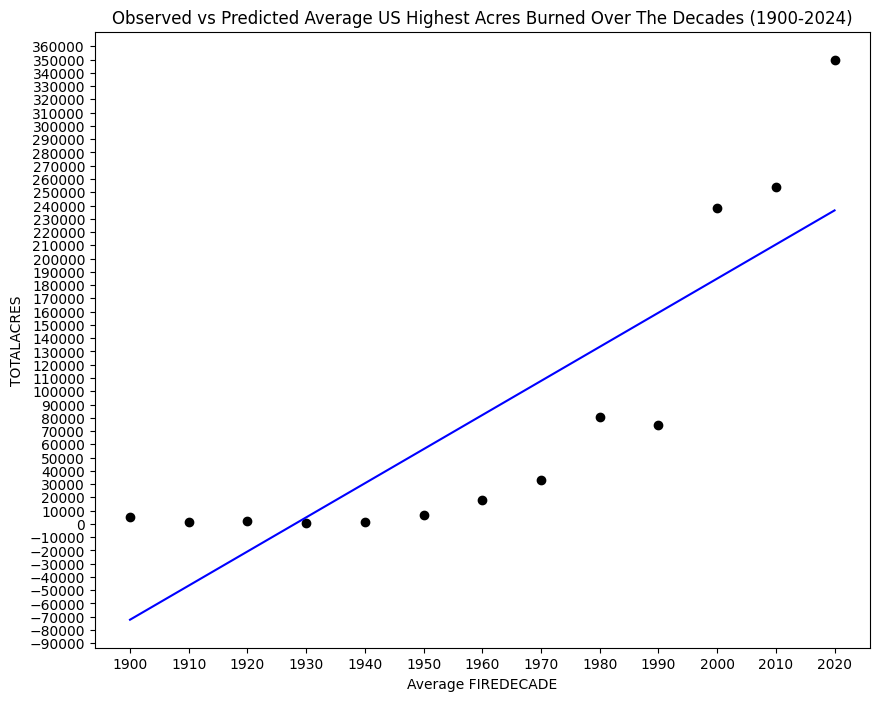

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

filtered_us_fires = us_fires[(us_fires['FIREYEAR'] <= 2024) & (us_fires['FIREYEAR'] >= 1900) & (us_fires['TOTALACRES'] >= 0)]

max_acres_per_year = filtered_us_fires.groupby('FIREYEAR')['TOTALACRES'].max().reset_index()

max_acres_per_year['FIREDECADE'] = (max_acres_per_year['FIREYEAR'] // 10) * 10
avg_max_acres_per_decade = max_acres_per_year.groupby('FIREDECADE')['TOTALACRES'].mean().reset_index()

X = avg_max_acres_per_decade[['FIREDECADE']].values
y = avg_max_acres_per_decade[['TOTALACRES']].values

linear_model = LinearRegression()
linear_model.fit(X, y)

y_predict = linear_model.predict(X)

r_squared = r2_score(y, y_predict)
mean_absolute_error_val = mean_absolute_error(y, y_predict)
print(f"Performance: {(r_squared * 100):.2f}%")
print(f"Mean Absolute Error: {mean_absolute_error_val:.5f}")

if r_squared > 0.7:
    print("High model performance.")
else:
    print("Low model performance.")

plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='black')
plt.plot(X, y_predict, color='blue')
plt.xlabel('Average FIREDECADE')
plt.ylabel('TOTALACRES')
plt.title('Observed vs Predicted Average US Highest Acres Burned Over The Decades (1900-2024)')
plt.xticks(np.arange(1900, 2024, 10))
plt.yticks(np.arange(-90000, 360001, 10000))
plt.show()

##**Interpretation:**
##Looking at our graph and data we can see that our results are positive and have a strong performance. We can also identify that on average for every decade there is a increase in the average amount of fire damage in total per decade with the start of the 2000s and onwards having a sharp increase in average highest fire damage.

---



# **Multiple Linear Regression Model**

##**Explanation of the Code**:
##This code implements a Multiple Linear Regression model using data from the US Fires dataset. The goal is to predict the size class (SIZECLASS) of a wildfire based on specific features: the year the fire occurred (FIREYEAR), the total acres burned (TOTALACRES), and additional information about the cause of the fire (STATCAUSE). Here’s a breakdown of the steps:

##1. **Data Preparation**:

* ## The SIZECLASS and STATCAUSE attributes, which are categorical, are converted into one-hot encoded columns. This encoding allows us to use these categorical variables as numerical features in the regression model.

##2. **Feature and Target Selection**:

* ## We selected FIREYEAR and TOTALACRES as continuous features and included each one-hot encoded column of STATCAUSE to represent different causes of wildfires.

##3. **Data Splitting**:

* ## The data is divided into training and testing sets. This ensures that we can evaluate the model on unseen data to verify its predictive performance.

##4. **Model Training**:

* ## A LinearRegression model from scikit-learn is trained on the training set. This model attempts to find the best-fit linear relationship between the chosen features and the target SIZECLASS classes.

##5. **Model Evaluation**:

* ## After making predictions on the test set, we calculate the Mean Squared Error (MSE). This metric helps assess the average squared difference between observed and predicted values, indicating model accuracy.

##6. **3D Visualization**:

* ## We visualize the observed and predicted size classes in a 3D plot, where:
   * ## The x-axis represents FIREYEAR.
   * ## The y-axis represents TOTALACRES.
   * ## The z-axis represents the observed vs. predicted values for one of the SIZECLASS categories.
* ## This graph provides a visual comparison between actual and predicted data points, highlighting the model’s performance.

##By running this code, we aim to:


*   ## Quantify the predictive relationship between fire attributes and their impact on the size of wildfires.
*   ## Assess how well the model predicts wildfire sizes and identify any patterns in the data.



Mean Squared Error: 0.04233979262890131


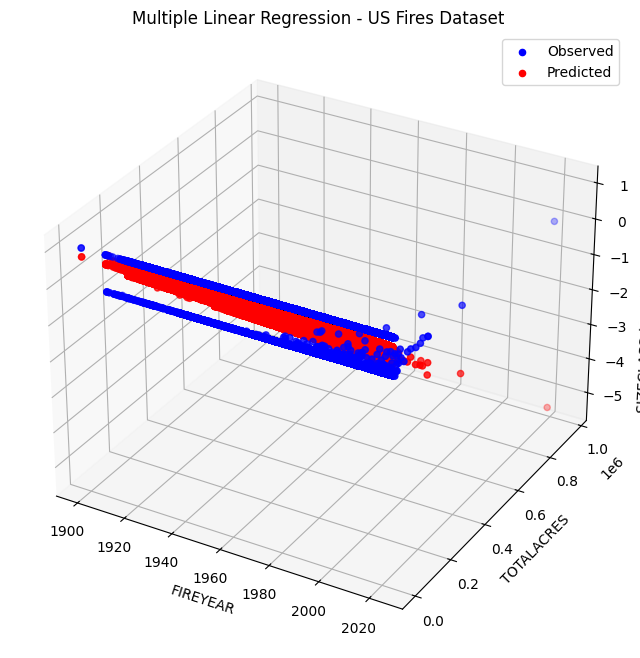

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

# Assuming `us_fires` is already defined in your notebook
# One-hot encode 'SIZECLASS' and 'STATCAUSE' if not already done
us_fires_copy = us_fires.copy()
us_fires_copy = pd.get_dummies(us_fires_copy, columns=['SIZECLASS', 'STATCAUSE'], prefix=['SIZECLASS', 'STATCAUSE'])

# Select features and target
# Here we're using 'FIREYEAR', 'TOTALACRES', and all STATCAUSE columns as predictors
features = ['FIREYEAR', 'TOTALACRES'] + [col for col in us_fires_copy.columns if col.startswith('STATCAUSE_')]
target = [col for col in us_fires_copy.columns if col.startswith('SIZECLASS_')]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(us_fires_copy[features], us_fires_copy[target], test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the observed and predicted values for a 3D visualization
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

ax.dist = 10

# Using 'FIREYEAR' and 'TOTALACRES' as the x and y axes, and the predicted SIZECLASS (first class as an example) as z-axis
ax.scatter(X_test['FIREYEAR'], X_test['TOTALACRES'], y_test.iloc[:, 0], color='blue', label='Observed')
ax.scatter(X_test['FIREYEAR'], X_test['TOTALACRES'], y_pred[:, 0], color='red', label='Predicted')

# Labels and title
ax.set_xlabel('FIREYEAR')
ax.set_ylabel('TOTALACRES')
ax.set_zlabel('SIZECLASS (Predicted vs Observed)')
ax.set_title('Multiple Linear Regression - US Fires Dataset')
ax.legend()

plt.show()

##**Interpretation of the Data**

##The 3D scatter plot visualizes the observed and predicted SIZECLASS values for fires based on FIREYEAR and TOTALACRES.

##**Key Observations:**

##1. **Mean Squared Error (MSE):**
## The model’s MSE is low, indicating that the predictions are relatively close to the actual observed values. A lower MSE typically suggests good model performance, though it’s essential to consider if this low error reflects true predictive accuracy or is influenced by the dataset’s structure.

##2. **Observed vs. Predicted Points:**

* ## The blue points represent the actual (observed) SIZECLASS values for various years and acre sizes.
* ## The red points represent the predicted values from the regression model.
* ## Most of the red points align closely with the blue points, especially for lower acre sizes and recent years, suggesting that the model performs well for smaller fires in recent data.

##3. **Trend with FIREYEAR and TOTALACRES:**

* ## As TOTALACRES increases, there is a more noticeable spread in SIZECLASS, with predictions still close to observed values.
* ## The model appears to generalize better with certain ranges of FIREYEAR and TOTALACRES, but it struggles to capture some outliers. This is visible in the scattered blue points without nearby red counterparts, indicating instances where the model did not predict as accurately.

##4. **Limitations and Outliers:**

* ## Some blue points are isolated without corresponding red predictions close by, suggesting that these fires had unique characteristics that the model couldn't capture well.
* ## The significant spread in the predicted values for certain years or total acre sizes may indicate that the linear model has difficulty fully explaining the complexity of the fire size distribution.

## 5. **Insights for Improvement:**

* ## If the goal is to improve predictive accuracy further, it might be beneficial to explore more complex models (e.g., polynomial regression or non-linear models) or to add other relevant features, such as geographic or environmental factors.
* ## The model might also benefit from tuning or additional features that capture the impact of other variables on fire size classification.


## **Conclusion**

## Overall, the model successfully predicts SIZECLASS for most fires with reasonable accuracy, as seen by the close alignment between observed and predicted points. However, certain limitations in handling outliers and the complexity of fire dynamics are evident, suggesting potential areas for further refinement in the model.

---



# **Section 3 - Logical Regression**

##**Explanation:**
##Using Logical Regression the goal is to Predict the probablity of belonging to a particular category or class. In this example I used the FIRETYPECATEGORY which will attempt to show the accuracy and performance for each classification in the FIRETYPECATEGORY variable.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select relevant columns
df_model = us_fires[['STATCAUSE', 'FIREYEAR', 'SIZECLASS', 'FIRETYPECATEGORY']].copy()

# Encode categorical variables
df_model = pd.get_dummies(df_model, columns=['STATCAUSE', 'SIZECLASS', 'FIREYEAR'], drop_first=True)

# Define features (X) and target (y)
X = df_model.drop('FIRETYPECATEGORY', axis=1)  # Assuming we're predicting 'FIRETYPECATEGORY'
y = us_fires['FIRETYPECATEGORY']  # Define target as FIRETYPECATEGORY

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=6000, class_weight='balanced')  # Increase max_iter if needed , class_weight='balanced'

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


## **Evalute the Model**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print("Classification Report: ")
print(classification_report(y_test, y_pred, zero_division=1))

Model Accuracy: 0.861099623060653
Classification Report: 
                       precision    recall  f1-score   support

CONTRACT EXTINGUISHER       1.00      0.00      0.00         1
        FIRE ACTIVITY       0.00      1.00      0.00         0
         FIRE WEATHER       1.00      0.00      0.00         1
      PRESCRIBED FIRE       0.00      1.00      0.00         0
         PROJECT PLAN       1.00      0.00      0.00         1
     RESEARCH PROJECT       0.00      1.00      0.00         0
              Unknown       0.08      0.75      0.14      2614
             WILDFIRE       1.00      0.86      0.92    166641

             accuracy                           0.86    169258
            macro avg       0.51      0.58      0.13    169258
         weighted avg       0.98      0.86      0.91    169258



## **Visualize the Model**

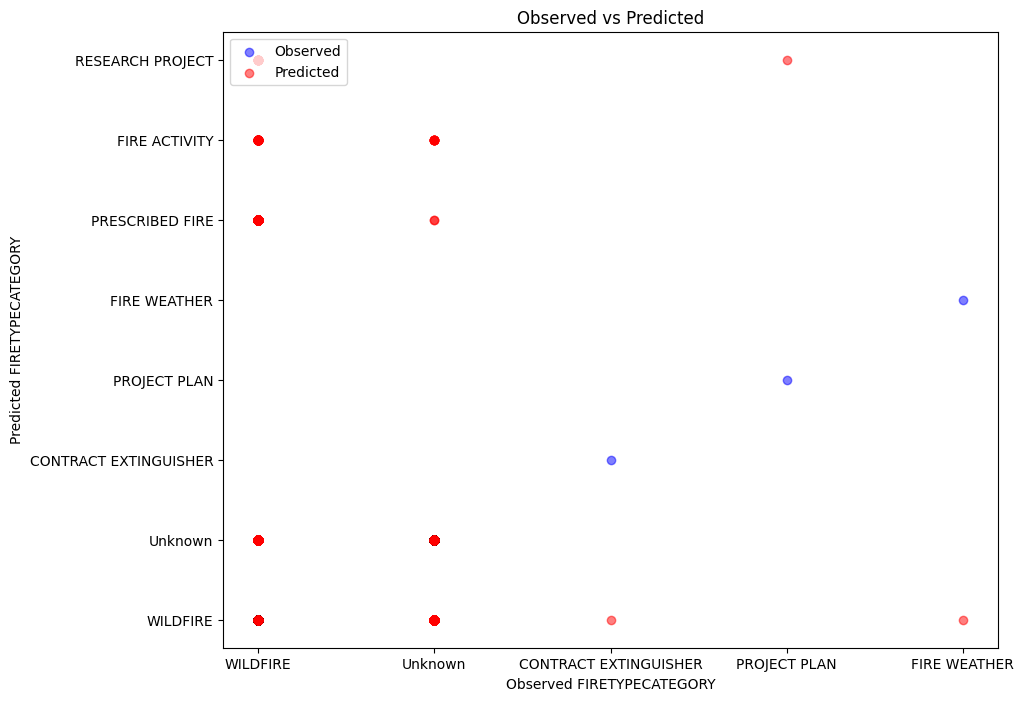

In [ ]:
# Import necessary packages
import numpy as np

# Plot Observed vs Predicted with different colors
plt.figure(figsize=(10, 8))

# Plot observed values in blue
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label="Observed")

# Plot predicted values in red
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label="Predicted")

# Add labels and title
plt.xlabel("Observed FIRETYPECATEGORY")
plt.ylabel("Predicted FIRETYPECATEGORY")
plt.title("Observed vs Predicted")
plt.legend(loc="upper left")
plt.show()

##**Interpretation:**
###This results in a model with 86% accuracy, however not without some outliers or problems.

#### **Accuracy within the Model**
#####For 'Wildfire' class, the model performs well with high precision and recall, indication that it correctly identifies 'Wildifre' instance in 86% of cases while minimizing false positives. The model also predicts 'Unknown' correctly 75% of the time, but struggle to do so with high precision as it often predicts 'Unknown' when it shouldn't.

#### **Problematic Issues**
#####'Wildfire' class accounts for 98% of the category, which is why the other categories don't as well. There is little to test over, and sometimes there may be nothing to test such as a category like 'RESEARCH PROJECT'.

#####That is why the weighted average's precision is 98% as it gives more weight to the large classes like 'Wildfire' and 'Unknown'.

#####Additions like "class_weight='balanced'" is used to give higher importance to minority classes during training, but due to thier low sample size logistical regression struggles to predict the minority classes accurately.

#####The high accuracy can be misleading in imbalanced datasets. A model may predict the majority class most of the time, while neglecting the smaller classes that may have low precision, giving a false idea of how accurate the model is in its totality.

---



#**Conclusion**

## Our understand of how our overall balance of our dataset has expanded. We have been able to identify the large margins that our overall dataset fall between. We have been able to learn about the relationship that the idea of average highest acres of distruction and decades play with one another. We have also been able to learn the relationship between acres of distruction, the class size of the fires, and the years of fires in the US have played with one another. Finally, we were able to identify margins of how large our relationship between our types of fires are and find there relationships with one another.

[Github](https://github.com/BMG2-Dev/Info-Breakers/blob/main/regression.ipynb)